In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [2]:
import os

BASIC_DIR = os.path.abspath('.')
DATA_DIR = os.path.join(BASIC_DIR, "datas/olivetti")

print(os.listdir(DATA_DIR))

['olivetti_faces_target.npy', 'olivetti_faces.npy']


In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
data = np.load(os.path.join(DATA_DIR, "olivetti_faces.npy"))
target = np.load(os.path.join(DATA_DIR, "olivetti_faces_target.npy"))

In [5]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1], data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [6]:
data.shape

(400, 64, 64)

In [7]:
print("unique target number:", np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [8]:
def show_40_distinct_people(images, unique_ids):
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr = axarr.flatten()
    
    for unique_id in unique_ids:
        image_index = unique_id * 10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

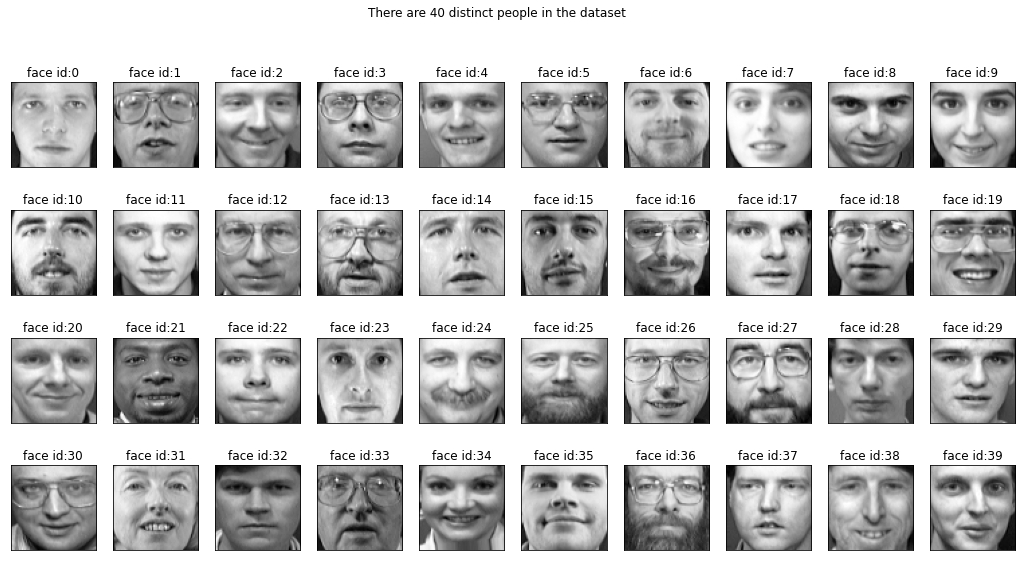

In [9]:
show_40_distinct_people(data, np.unique(target))

In [10]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10 # 每个对象有 10 张不同的面部图像
    rows=(len(subject_ids) * 10) / cols 
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    # axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id * 10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

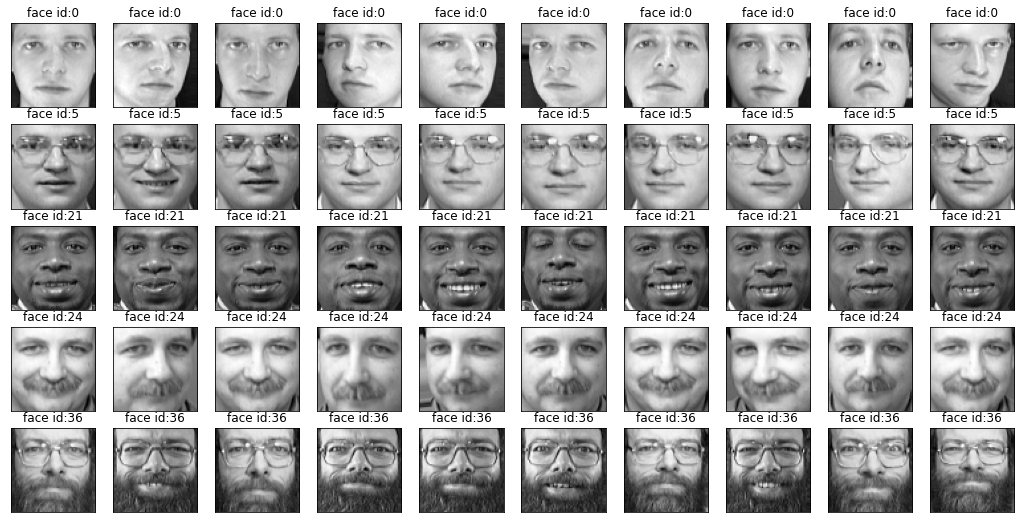

In [11]:
show_10_faces_of_n_subject(images=data, subject_ids=[0, 5, 21, 24, 36])

In [12]:
X = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
print("X shape:", X.shape)

X shape: (400, 4096)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)

In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

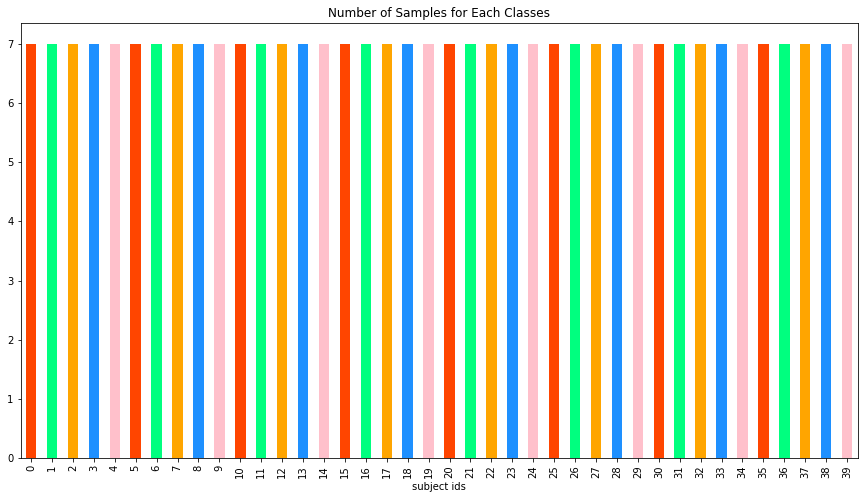

In [15]:
y_frame = pd.DataFrame()
y_frame['subject ids'] = y_train
y_frame.groupby(['subject ids']).size().plot.bar(
    figsize=(15, 8),
    color=['orangered', 'springgreen', 'orange', 'dodgerblue', 'pink'],
    title="Number of Samples for Each Classes")

In [16]:
y_frame

,subject ids
0,31
1,26
2,9
3,31
4,26
...,...
275,3
276,39
277,38
278,31


In [17]:
import mglearn

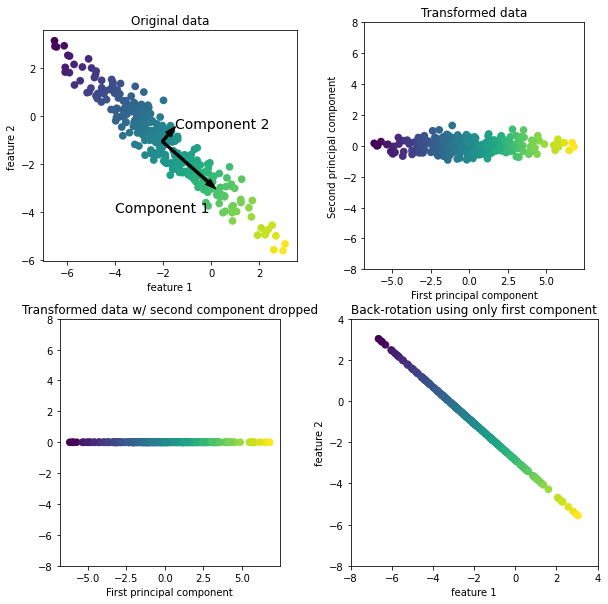

In [18]:
mglearn.plots.plot_pca_illustration()

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
pca.fit(X)

PCA(n_components=2)

In [22]:
X_pca = pca.transform(X)

In [23]:
number_of_people = 10

In [24]:
index_range = number_of_people * 10

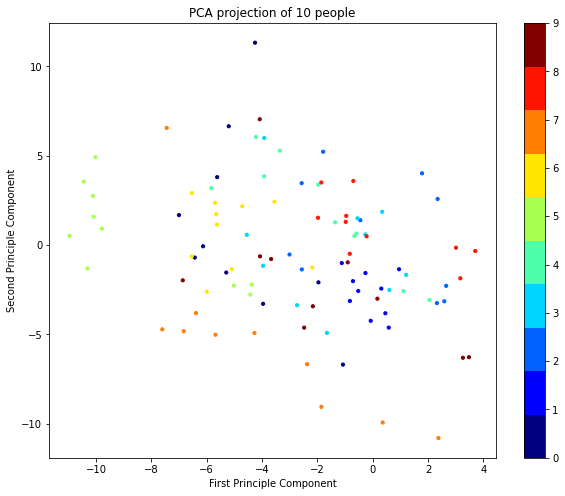

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(
    X_pca[:index_range, 0],
    X_pca[:index_range, 1], 
    c=target[:index_range],
    s=10,
    cmap=plt.get_cmap('jet', number_of_people)
)

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

In [26]:
pca = PCA()
pca.fit(X)

PCA()

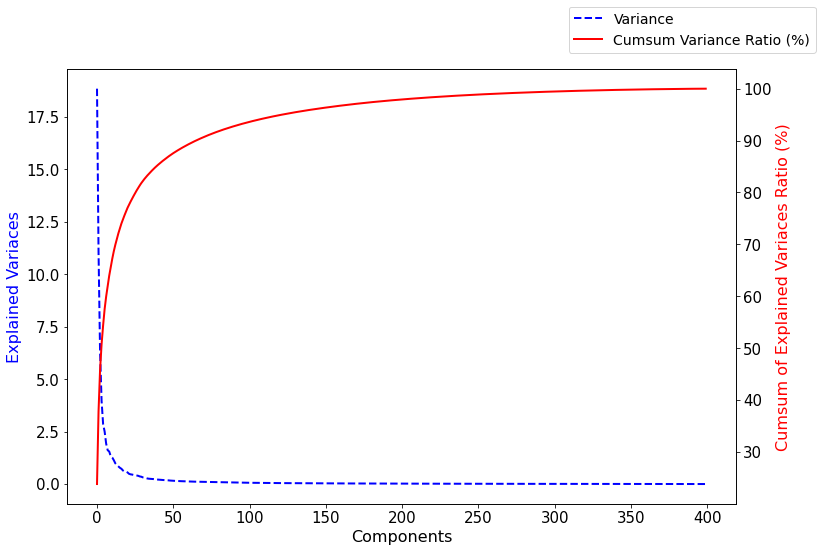

In [27]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(pca.explained_variance_, 'b--', linewidth=2, label = 'Variance')
 
plt.xlabel('Components', size=16)
plt.ylabel('Explained Variaces', size=16, color='b')
plt.tick_params(labelsize=15)

# 右轴显示累积的方差解释率
ax2 = ax1.twinx()

plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100, 'r', linewidth=2,
         label = 'Cumsum Variance Ratio (%)')

plt.ylabel('Cumsum of Explained Variaces Ratio (%)', size=16, color='r')
plt.tick_params(labelsize=15)

# fig.legend(loc='best', prop={'size': 14}, bbox_transform=ax1.transAxes)
fig.legend(prop={'size': 14}, bbox_transform=ax1.transAxes)

In [28]:
n_components = 90

In [29]:
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

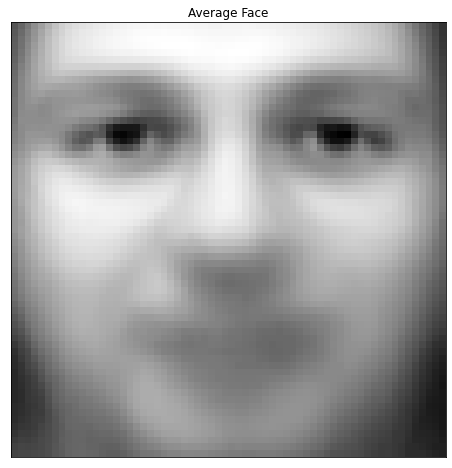

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(pca.mean_.reshape((64, 64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [31]:
number_of_eigenfaces = len(pca.components_)

In [32]:
number_of_eigenfaces

90

In [33]:
eigen_faces = pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

Text(0.5, 0.98, 'All Eigen Faces')

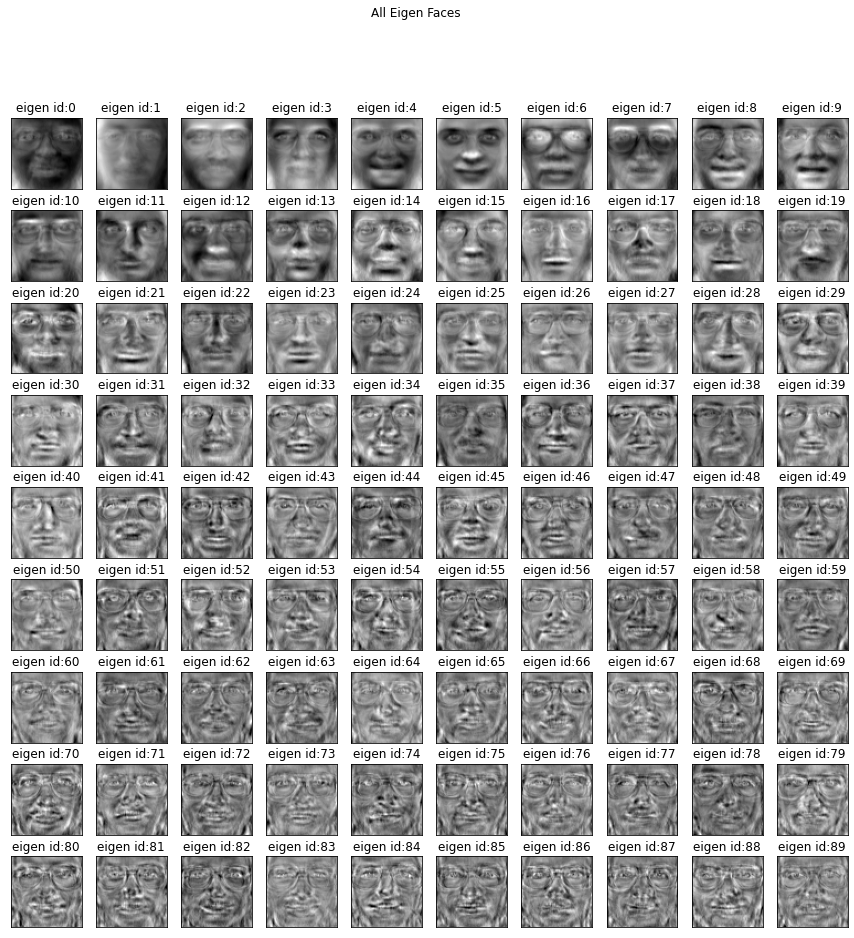

In [34]:
cols = 10
rows = int(number_of_eigenfaces/cols)
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i], cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10 * "=", 10 * "="))

In [35]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [36]:
from sklearn.svm import SVC

In [37]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

In [38]:
print("accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score: 0.91


In [39]:
import seaborn as sns

<AxesSubplot:>

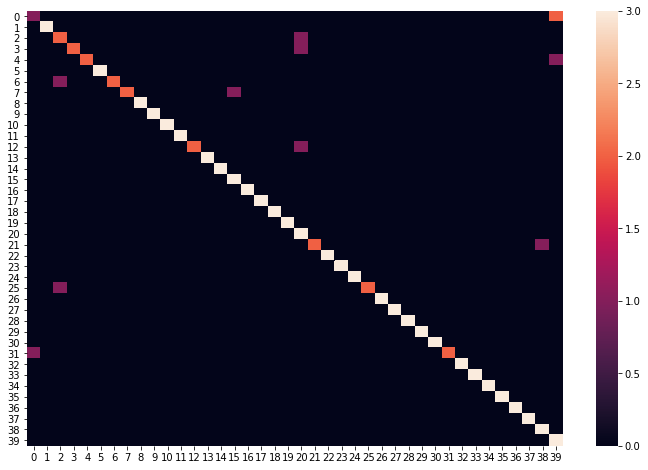

In [40]:
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [42]:
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(("DT", DecisionTreeClassifier()))
models.append(("SVM", SVC()))

In [43]:
models

[('LDA', LinearDiscriminantAnalysis()),
 ('LR', LogisticRegression()),
 ('NB', GaussianNB()),
 ('KNN', KNeighborsClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('SVM', SVC())]

In [44]:
for name, model in models:
    
    clf = model
    clf.fit(X_train_pca, y_train)
    
    y_pred = clf.predict(X_test_pca)
    
    print(10 * "=", "{} Result".format(name).upper(), 10 * "=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.93

========== LR RESULT ==========
Accuracy score:0.93

========== NB RESULT ==========
Accuracy score:0.85

========== KNN RESULT ==========
Accuracy score:0.69

========== DT RESULT ==========
Accuracy score:0.62

========== SVM RESULT ==========
Accuracy score:0.91



In [45]:
from sklearn.model_selection import cross_val_score, KFold

In [46]:
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)

In [47]:
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores = cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.97
LR mean cross validations score:0.93
NB mean cross validations score:0.78
KNN mean cross validations score:0.68
DT mean cross validations score:0.53
SVM mean cross validations score:0.87


In [48]:
lr = LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

In [49]:
print("Accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score: 0.93


<AxesSubplot:>

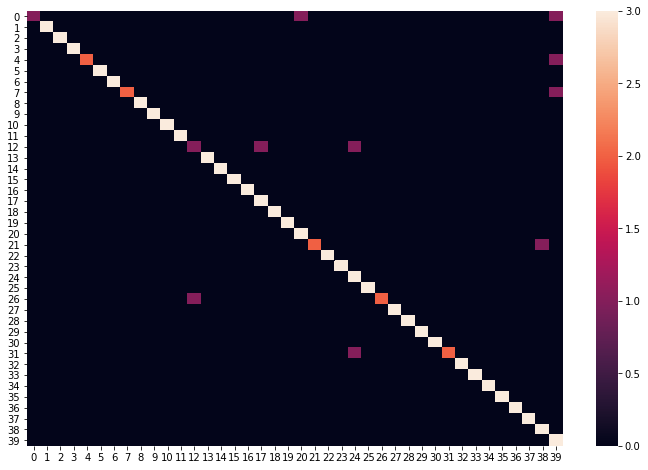

In [50]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(12, 8))
sns.heatmap(cm)

In [51]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.33      0.40         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

In [52]:
from sklearn.model_selection import LeaveOneOut

In [53]:
loo_cv = LeaveOneOut()
clf = LogisticRegression(solver="liblinear")
cv_scores = cross_val_score(clf, X_pca, target, cv=loo_cv)

In [54]:
print("{} Leave One Out cross-validation mean accuracy score: {:.2f}".format(
    clf.__class__.__name__, cv_scores.mean()))

LogisticRegression Leave One Out cross-validation mean accuracy score: 0.96


In [55]:
cv_scores.shape

(400,)

In [56]:
loo_cv = LeaveOneOut()
clf = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(clf, X_pca, target, cv=loo_cv)

In [57]:
print("{} Leave One Out cross-validation mean accuracy score: {:.2f}".format(
    clf.__class__.__name__, cv_scores.mean()))

LinearDiscriminantAnalysis Leave One Out cross-validation mean accuracy score: 0.98


In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
np.logspace(0, 4, 10)

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [60]:
params = {'penalty': ['l1', 'l2'], 'C': np.logspace(0, 4, 10)}

In [61]:
clf = LogisticRegression()

In [62]:
loo_cv = LeaveOneOut()

In [63]:
gridSearchCV = GridSearchCV(clf, params, cv=loo_cv)
gridSearchCV.fit(X_train_pca, y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [64]:
print("Grid search fitted..")
print(gridSearchCV.best_params_)
print(gridSearchCV.best_score_)
print("grid search cross validation score: {:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))

Grid search fitted..
{'C': 21.544346900318832, 'penalty': 'l2'}
0.925
grid search cross validation score: 0.93


In [65]:
lr = LogisticRegression(C=1, penalty="l2")
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1)

In [66]:
print("lr score: {:.2f}".format(lr.score(X_test_pca, y_test)))

lr score: 0.93


In [67]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [68]:
Target = label_binarize(target, classes=range(40))

In [69]:
print(Target.shape)
print(Target[100])

(400, 40)
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [70]:
n_classes = Target.shape[1]

In [71]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(
    X, Target, test_size=0.3, stratify=Target, random_state=0)

In [72]:
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca = pca.transform(X_train_multiclass)
X_test_multiclass_pca = pca.transform(X_test_multiclass)

In [73]:
oneRestClassifier = OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score = oneRestClassifier.decision_function(X_test_multiclass_pca)

In [74]:
y_score.shape

(120, 40)

In [75]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

In [76]:
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(), y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score, average="micro")

print('Average precision score, micro-averaged over all classes: {0:0.2f}'
    .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.97


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.97')

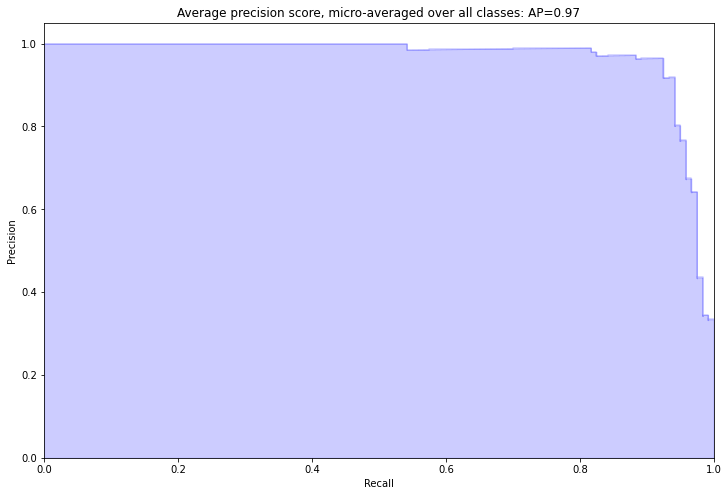

In [77]:
from funcsigs import signature

step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
plt.figure(1, figsize=(12,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))

In [78]:
lda = LinearDiscriminantAnalysis(n_components=n_classes-1)
X_train_lda = lda.fit(X_train, y_train).transform(X_train)
X_test_lda = lda.transform(X_test)

In [79]:
lr = LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_lda, y_train)
y_pred = lr.predict(X_test_lda)

In [80]:
print("Accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Accuracy score: 0.95
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00   

In [81]:
from sklearn.pipeline import Pipeline

In [82]:
work_flows_std = list()
work_flows_std.append(('lda', LinearDiscriminantAnalysis(n_components=n_classes-1)))
work_flows_std.append(('logreg', LogisticRegression(C=1.0, penalty="l2")))
model_std = Pipeline(work_flows_std)
model_std.fit(X_train, y_train)
y_pred = model_std.predict(X_test)

In [83]:
print("Accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Accuracy score: 0.95
Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00   